In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

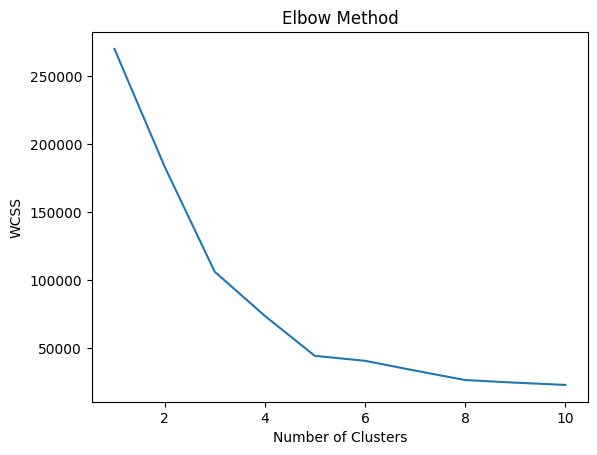

In [4]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

data['Cluster'] = clusters


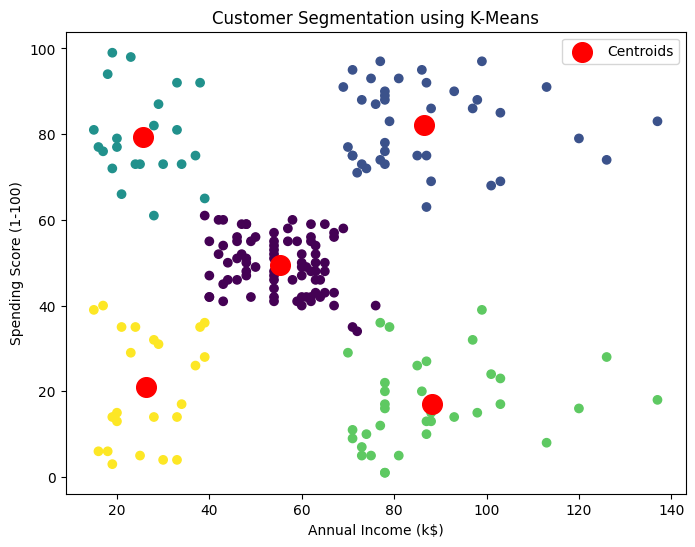

In [6]:
plt.figure(figsize=(8, 6))

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()


**Intrepretation**

K-Means clustering divided the customers into 5 distinct groups based on Annual Income and Spending Score. The model identified segments such as high-income high-spenders (premium customers), high-income low-spenders (potential growth customers), low-income high-spenders (price-sensitive buyers), low-income low-spenders (low-value segment), and average-income average-spenders (stable customers).

This segmentation helps the retail store design targeted marketing strategies, improve customer retention, and maximize profits by focusing on high-value and high-potential customers.